# Assignment #1 Applying K-Nearest Neighbors (KNN) with Cross-Validation, Hyperparameter Tuning, and Explainable AI Analysis.
###  Datataset: Digits Dataset (Handwritten digit classification)


## 1. Loading the Dataset using  sklearn

In [2]:
from sklearn.datasets import load_digits

# Load the Digits dataset
digits = load_digits()

# Extract the feature data and target labels
X = digits.data
y = digits.target

# Print the shape of X and Y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (1797, 64)
Shape of y: (1797,)


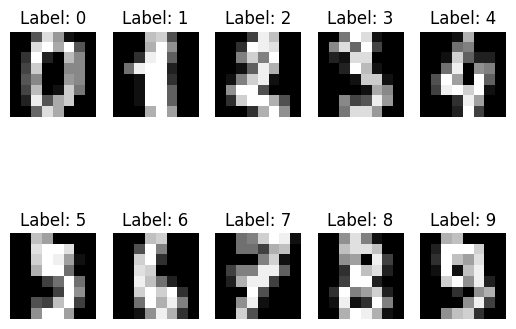

In [3]:
import matplotlib.pyplot as plt

# Visualizing the first 10 digits in the dataset
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.show()


## 2. Data Preprocessing
- Feature Scalling
- Splitting the data into train(80%) and test(20%) sets

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature Scalling using Z-score Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled dataset into training(80%) and testing sets  (20%)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of the datasets
print(f"Training features shape: {X_train_scaled.shape}")
print(f"Testing features shape: {X_test_scaled.shape}")


Training features shape: (1437, 64)
Testing features shape: (360, 64)


## 3. Implement K-Nearest Neighbors (KNN) algorithm to Classify the dataset

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for k=3: {accuracy*100:.4f}%")

Accuracy for k=3: 96.9444%


## 4. Experimenting with different values of K(number of neighbors)

In [19]:
import numpy as np

# Initialize lists to store the results
k_values = list(range(1, 21))  # Experiment with k from 1 to 20
accuracy_scores = []

# Loop over different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy*100:.4f}%")


# Select Best Value of K
best_k_index = np.argmax(accuracy_scores)
best_k = k_values[best_k_index]
best_accuracy = accuracy_scores[best_k_index]

# Print the best k value and its accuracy
print("----------------------------------------------------------")
print(f"Best k: {best_k} with accuracy: {best_accuracy*100:.4f}%")
print("----------------------------------------------------------")

Accuracy for k=1: 97.7778%
Accuracy for k=2: 96.3889%
Accuracy for k=3: 96.9444%
Accuracy for k=4: 96.1111%
Accuracy for k=5: 97.5000%
Accuracy for k=6: 96.6667%
Accuracy for k=7: 97.2222%
Accuracy for k=8: 96.9444%
Accuracy for k=9: 97.2222%
Accuracy for k=10: 97.2222%
Accuracy for k=11: 97.2222%
Accuracy for k=12: 96.9444%
Accuracy for k=13: 97.5000%
Accuracy for k=14: 96.9444%
Accuracy for k=15: 96.3889%
Accuracy for k=16: 96.3889%
Accuracy for k=17: 96.3889%
Accuracy for k=18: 96.3889%
Accuracy for k=19: 95.8333%
Accuracy for k=20: 96.1111%
----------------------------------------------------------
Best k: 1 with accuracy: 97.7778%
----------------------------------------------------------


## 5.	Apply k-fold cross-validation to evaluate the performance of the KNN model using appropriate metrics such as accuracy, precision, recall, and F1-score.

In [7]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize the KNN model with the best k found earlier (best_k=3)
knn = KNeighborsClassifier(n_neighbors=best_k)

# Apply k-fold cross-validation with 5 folds
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Get the cross-validation accuracy scores
cv_accuracy_scores = cross_val_score(knn, X_scaled, y, cv=cv, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_accuracy_scores}")
print(f"Mean cross-validation accuracy: {cv_accuracy_scores.mean():.4f}")

# Calculate cross-validation scores for Precision, Recall, and F1-Score
cv_precision = cross_val_score(knn, X_scaled, y, cv=cv, scoring='precision_macro')
cv_recall = cross_val_score(knn, X_scaled, y, cv=cv, scoring='recall_macro')
cv_f1 = cross_val_score(knn, X_scaled, y, cv=cv, scoring='f1_macro')

# Print the cross-validation scores for each metric
print(f"Cross-validation precision scores: {cv_precision}")
print(f"Mean precision: {cv_precision.mean():.4f}")
print(f"Cross-validation recall scores: {cv_recall}")
print(f"Mean recall: {cv_recall.mean():.4f}")
print(f"Cross-validation F1 scores: {cv_f1}")
print(f"Mean F1 score: {cv_f1.mean():.4f}")


Cross-validation accuracy scores: [0.97777778 0.96944444 0.97214485 0.98328691 0.95543175]
Mean cross-validation accuracy: 0.9716
Cross-validation precision scores: [0.9764606  0.9714239  0.97202401 0.98376741 0.95781749]
Mean precision: 0.9723
Cross-validation recall scores: [0.97773419 0.96873374 0.97096511 0.98269091 0.95507196]
Mean recall: 0.9710
Cross-validation F1 scores: [0.97683055 0.96960293 0.97112692 0.98294702 0.95581387]
Mean F1 score: 0.9713


## 6.	Performing hyperparameter tuning to optimize the value of k and distance metrics (e.g., Euclidean, Manhattan) using grid search to identify the best combination of hyperparameters.

In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': list(range(1, 21)),  # k values from 1 to 20
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Set up a 5-fold cross-validation with a fixed random state to ensure reproducibility
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# GridSearchCV with fixed random state for reproducibility
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best hyperparameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Update best_k
best_k = best_params['n_neighbors']

# Print the best hyperparameters and corresponding accuracy
print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")


Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 1}
Best cross-validation accuracy: 0.9777


## 7. Performance Graphs
-	Accuracy vs. k values.
- Validation scores across different folds.
- Confusion matrix for the best-performing model.

### Accuracy vs K Values




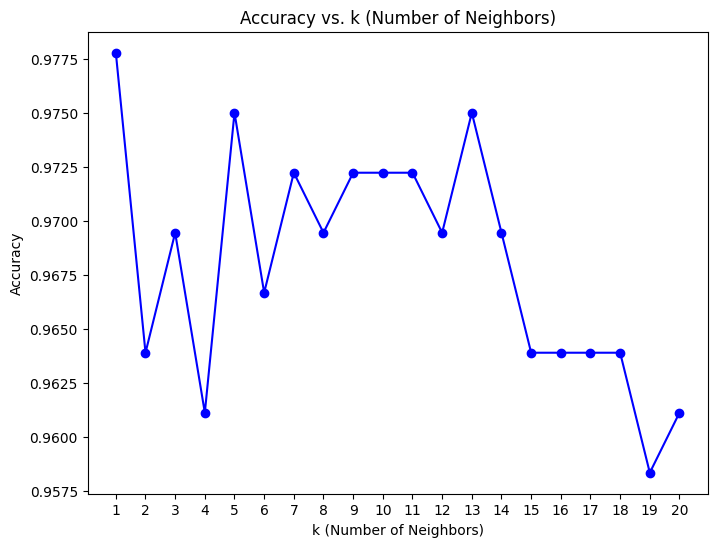

In [9]:
# See accuracy scores calculation in step 4
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k (Number of Neighbors)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

### Validation scores across different folds.



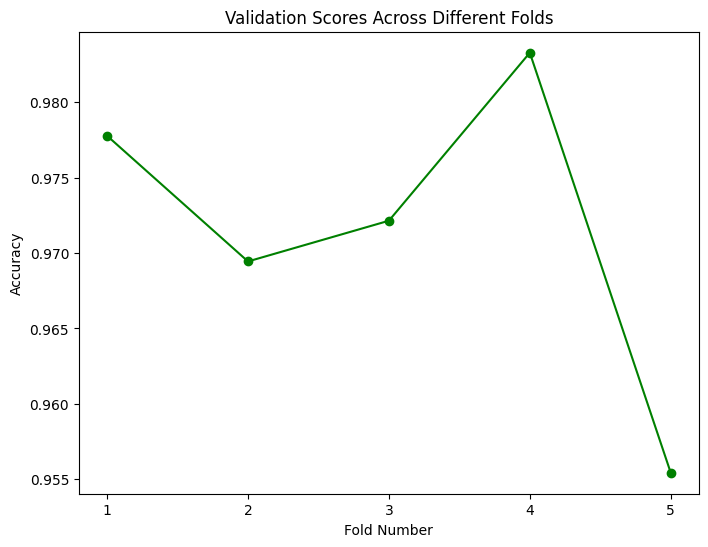

In [10]:
# See cv_accuracy_scores calculation in step 5
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_accuracy_scores)+1), cv_accuracy_scores, marker='o', linestyle='-', color='g')
plt.title('Validation Scores Across Different Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(cv_accuracy_scores) + 1))
plt.show()

### Confusion matrix for the best-performing model.

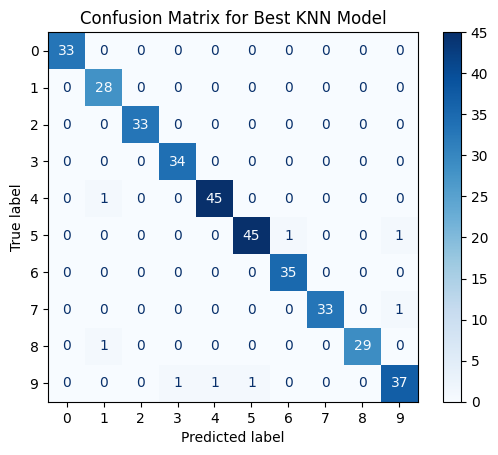

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fit the model with the best k value on the full training data
knn = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Best KNN Model')
plt.show()


## 8. Applying XAI techniques (Permutation Feature Importance) to explain the results of my model.

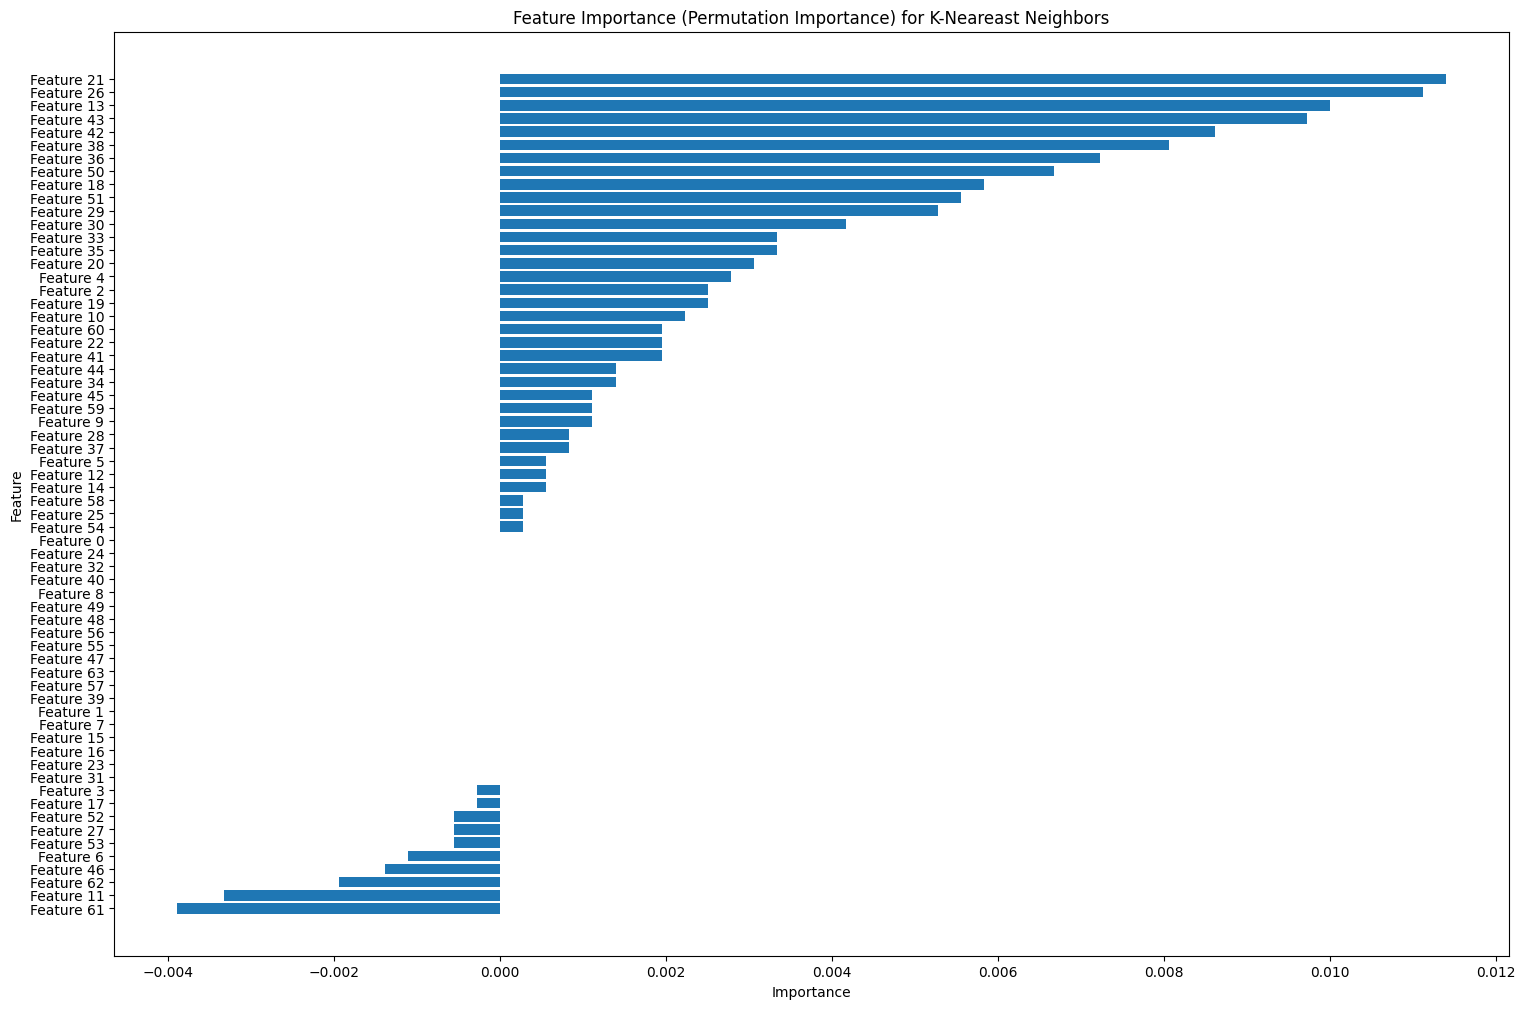

In [12]:
from sklearn.inspection import permutation_importance

# Train the KNN model with the best k and best distance
knn = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn.fit(X_train_scaled, y_train)

# Calculate permutation importance
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get the feature importance values and corresponding feature names
importance = result.importances_mean
indices = importance.argsort()

# Plot the feature importances
plt.figure(figsize=(18, 12))
plt.title("Feature Importance (Permutation Importance) for K-Neareast Neighbors")
plt.barh(range(X_train_scaled.shape[1]), importance[indices], align="center")
plt.yticks(range(X_train_scaled.shape[1]), [f"Feature {i}" for i in indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## 9. Applying a different Machine learning classifier (Logistic Regression)

In [15]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Accuracy and report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

# Apply Kfold
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Get the cross-validation accuracy scores
cv_accuracy_scores = cross_val_score(log_reg, X_scaled, y, cv=cv, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_accuracy_scores}")
print(f"Mean cross-validation accuracy: {cv_accuracy_scores.mean():.4f}")

# Calculate cross-validation scores for Precision, Recall, and F1-Score
cv_precision = cross_val_score(log_reg, X_scaled, y, cv=cv, scoring='precision_macro')
cv_recall = cross_val_score(log_reg, X_scaled, y, cv=cv, scoring='recall_macro')
cv_f1 = cross_val_score(log_reg, X_scaled, y, cv=cv, scoring='f1_macro')

# Print the cross-validation scores for each metric
print(f"Cross-validation precision scores: {cv_precision}")
print(f"Mean precision: {cv_precision.mean():.4f}")
print(f"Cross-validation recall scores: {cv_recall}")
print(f"Mean recall: {cv_recall.mean():.4f}")
print(f"Cross-validation F1 scores: {cv_f1}")
print(f"Mean F1 score: {cv_f1.mean():.4f}")


Logistic Regression Accuracy: 0.9722222222222222
Cross-validation accuracy scores: [0.97222222 0.96944444 0.9637883  0.96100279 0.95264624]
Mean cross-validation accuracy: 0.9638
Cross-validation precision scores: [0.97372002 0.9712467  0.96352154 0.9591764  0.95421584]
Mean precision: 0.9644
Cross-validation recall scores: [0.97437028 0.97016185 0.96453377 0.95989529 0.9545544 ]
Mean recall: 0.9647
Cross-validation F1 scores: [0.9739667  0.97036719 0.96320099 0.9588466  0.95415291]
Mean F1 score: 0.9641


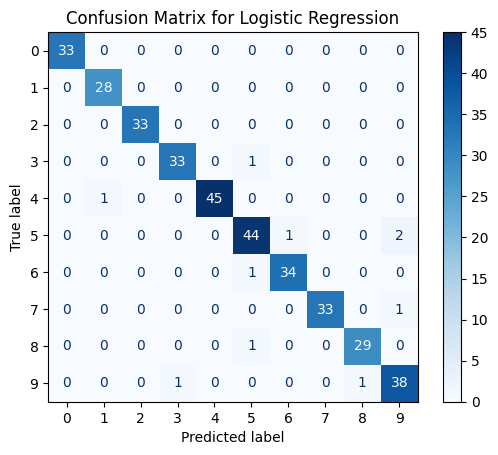

In [16]:
# Predict on the test set using the Logistic Regression model
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Generate confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Display confusion matrix
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=log_reg.classes_)
disp_log_reg.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

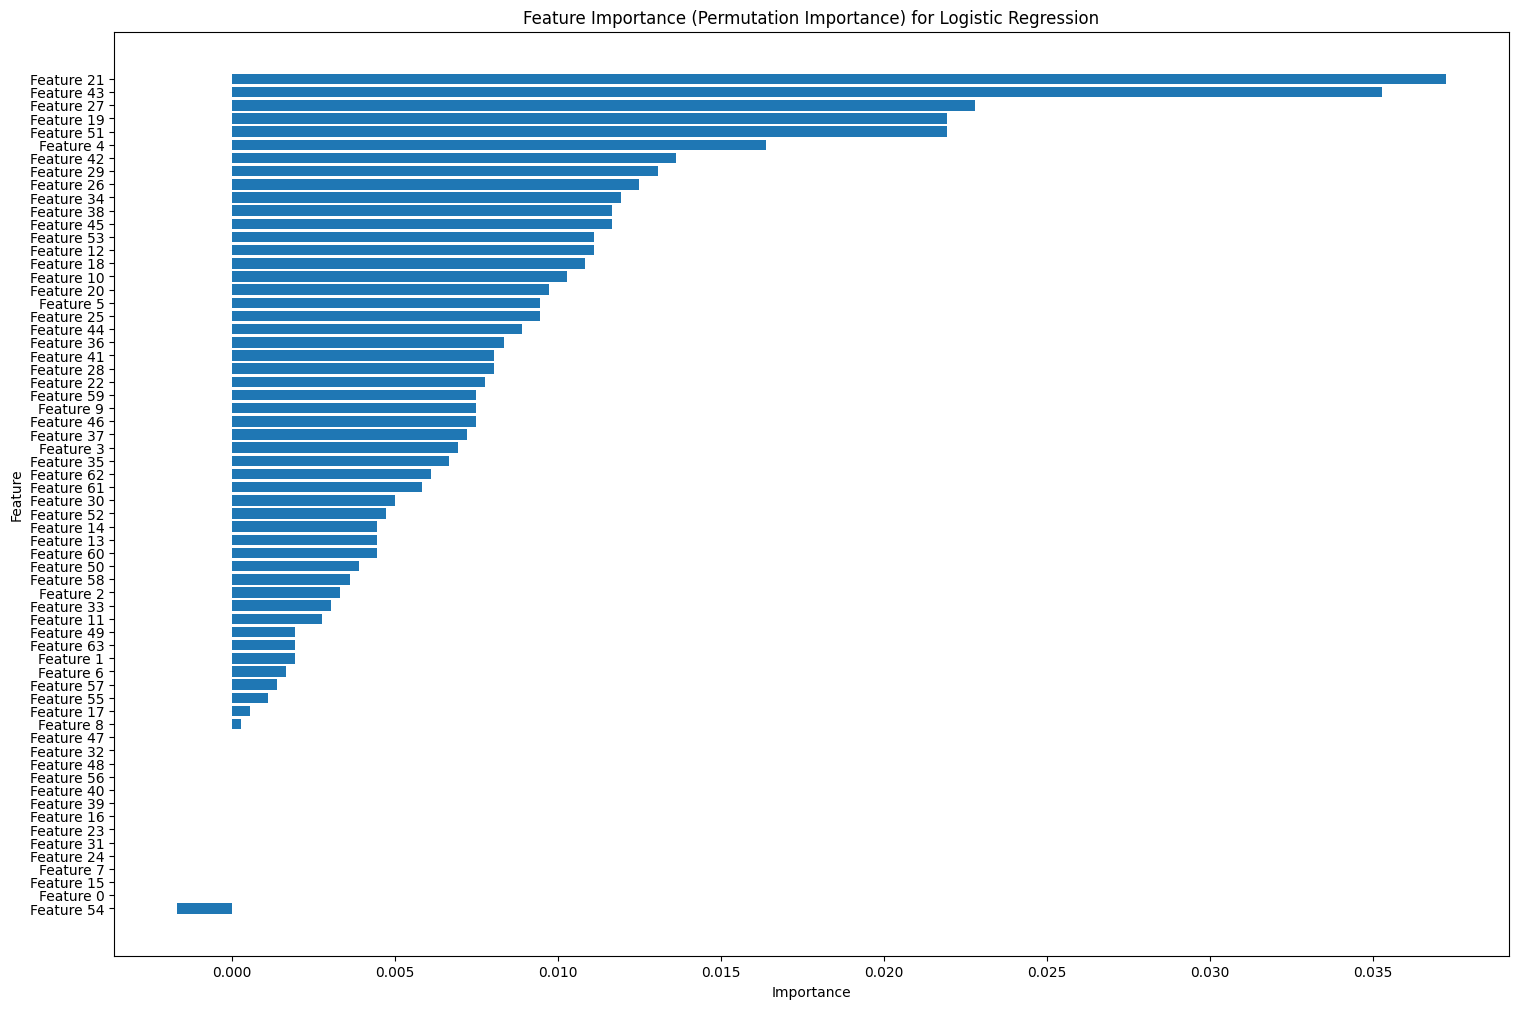

In [17]:

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Calculate permutation importance
result = permutation_importance(log_reg, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get the feature importance values and corresponding feature names
importance = result.importances_mean  # Mean importance for each feature
indices = importance.argsort()  # Sort the indices based on importance

# Plot the feature importances
plt.figure(figsize=(18, 12))
plt.title("Feature Importance (Permutation Importance) for Logistic Regression")
plt.barh(range(X_train_scaled.shape[1]), importance[indices], align="center")
plt.yticks(range(X_train_scaled.shape[1]), [f"Feature {i}" for i in indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
